In [1]:
# Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri yükleme
df = pd.read_csv('netflix_titles.csv')

In [3]:
# İlk beş satır
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Eksik verilerin sayısı
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Veri tipleri
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [6]:
# Sütun isimleri
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Veri şekli
df.shape

(8807, 12)

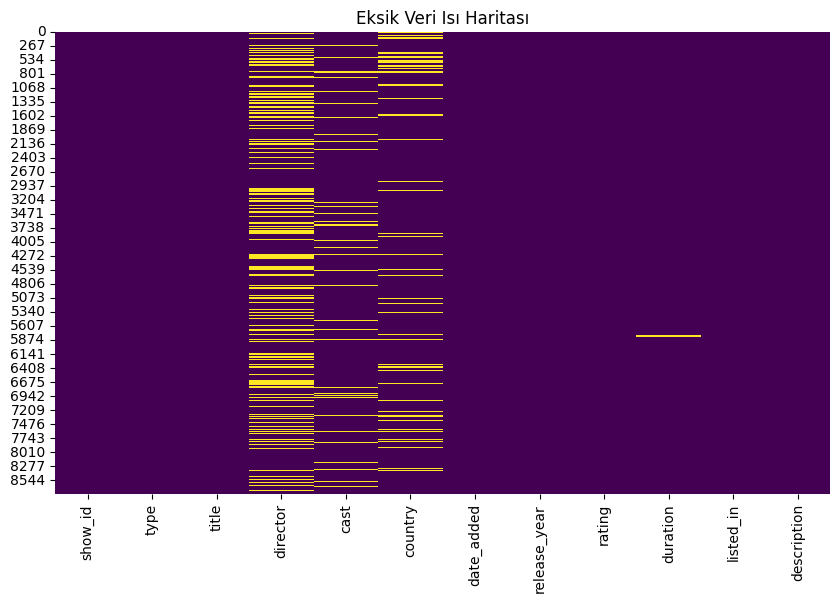

In [8]:
# Eksik veri ısı haritası
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Veri Isı Haritası")
plt.show()

In [9]:
# Eşsiz değerlerin sayısı
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


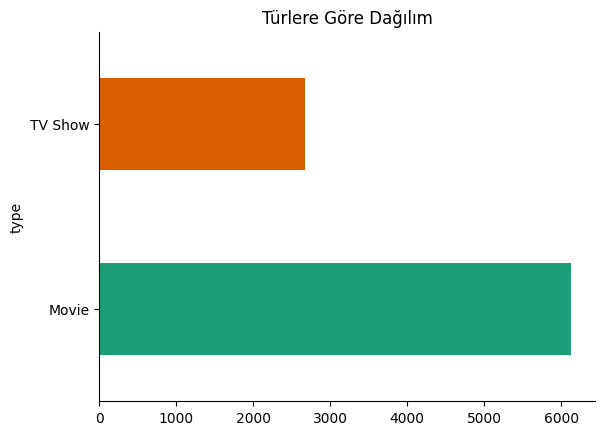

In [10]:
# Türlere göre dağılım
df.groupby('type').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Türlere Göre Dağılım")
plt.show()

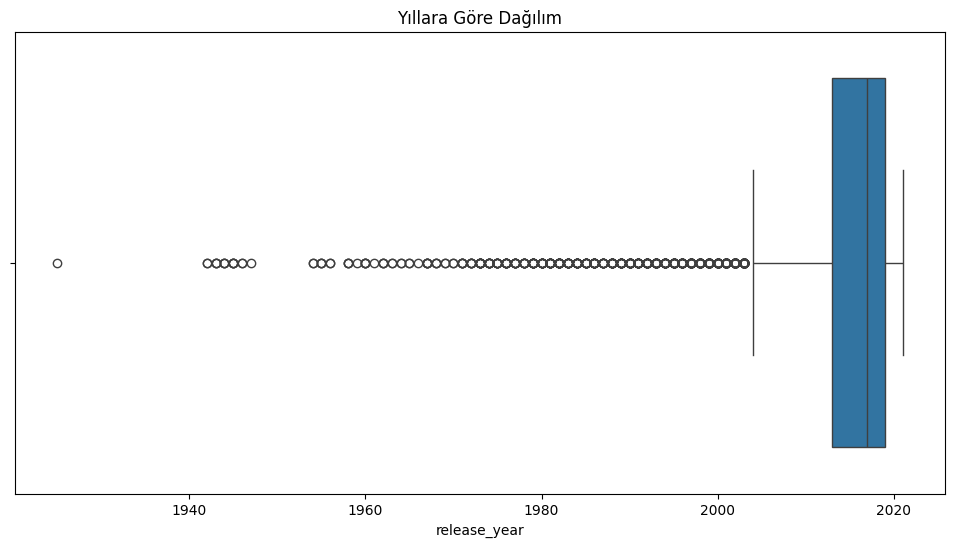

In [11]:
# Yıllara göre boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["release_year"])
plt.title("Yıllara Göre Dağılım")
plt.show()

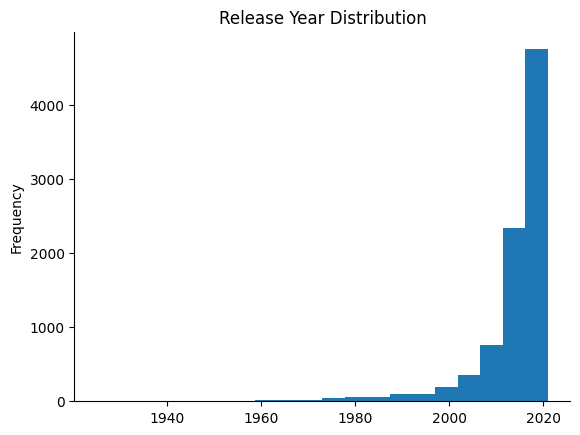

In [12]:
# Yıllara göre histogram
df['release_year'].plot(kind='hist', bins=20, title='Release Year Distribution')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [13]:
# Eksik verileri çıkarma
df_new = df.dropna()
df_new.shape

(5332, 12)

In [14]:
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


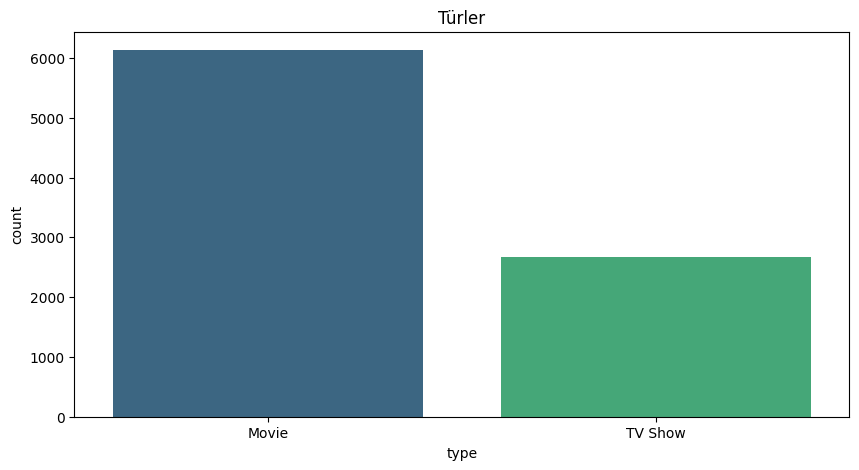

In [15]:
# Türlerin sayısı
sns.countplot(x=df["type"], hue=df["type"], palette="viridis", dodge=False, legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title("Türler")
plt.show()

<ipython-input-16-ff843dda2eb4>:4: UserWarning: The palette list has more values (18) than needed (17), which may not be intended.
  sns.countplot(x="rating", hue="rating", data=df, palette=palette, dodge=False, legend=False)


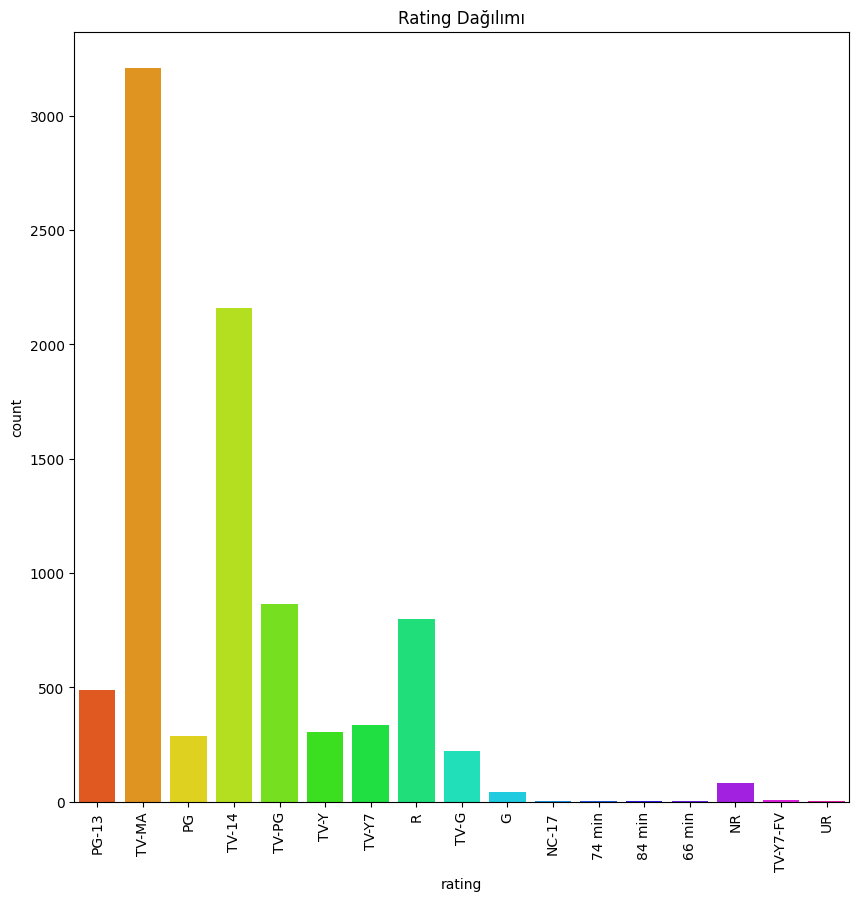

In [16]:
# Ratinglerin sayısı (Her bar için farklı renkler)
unique_ratings = df["rating"].unique()
palette = sns.color_palette("hsv", len(unique_ratings))
sns.countplot(x="rating", hue="rating", data=df, palette=palette, dodge=False, legend=False)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title("Rating Dağılımı")
plt.show()

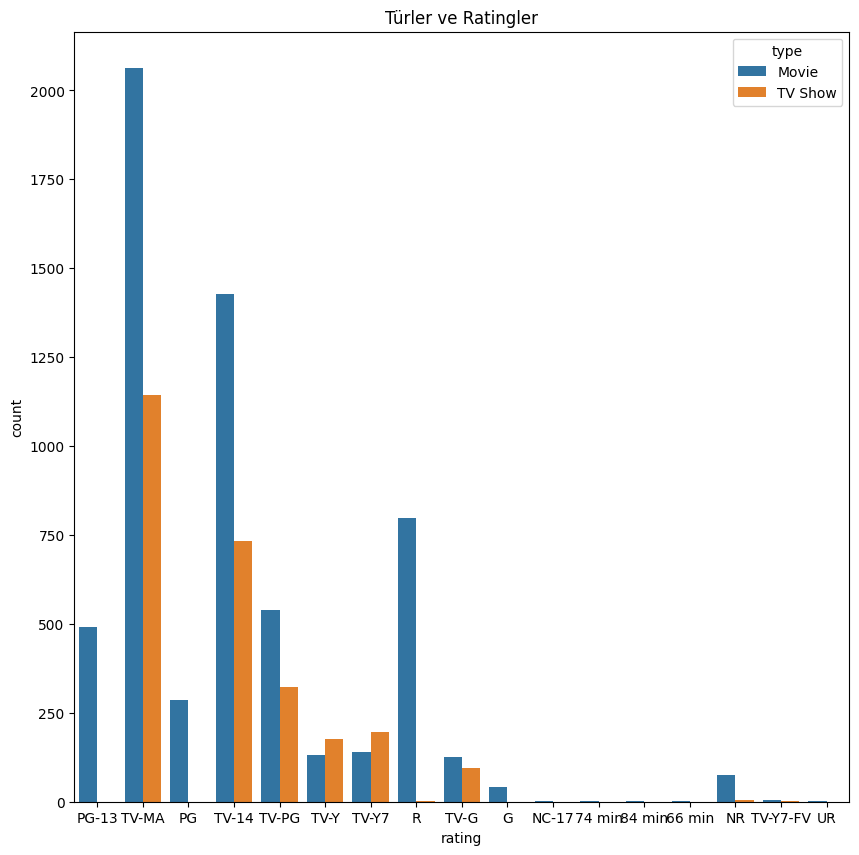

In [17]:
# Türler ve ratingler
plt.figure(figsize=(10, 10))
sns.countplot(x=df["rating"], hue=df["type"], data=df)
plt.title("Türler ve Ratingler")
plt.show()

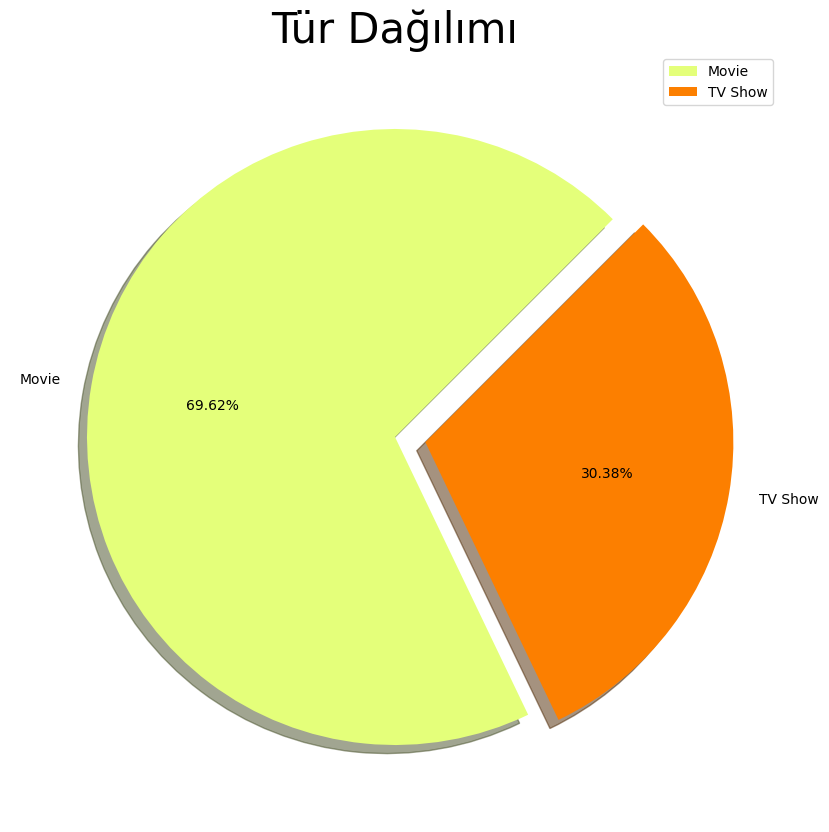

In [18]:
# Tür dağılımı (pie chart)
labels = ["Movie", "TV Show"]
size = df["type"].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams["figure.figsize"] = (10, 10)
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct="%.2f%%", shadow=True, startangle=45)
plt.title("Tür Dağılımı", fontsize=30)
plt.legend()
plt.show()

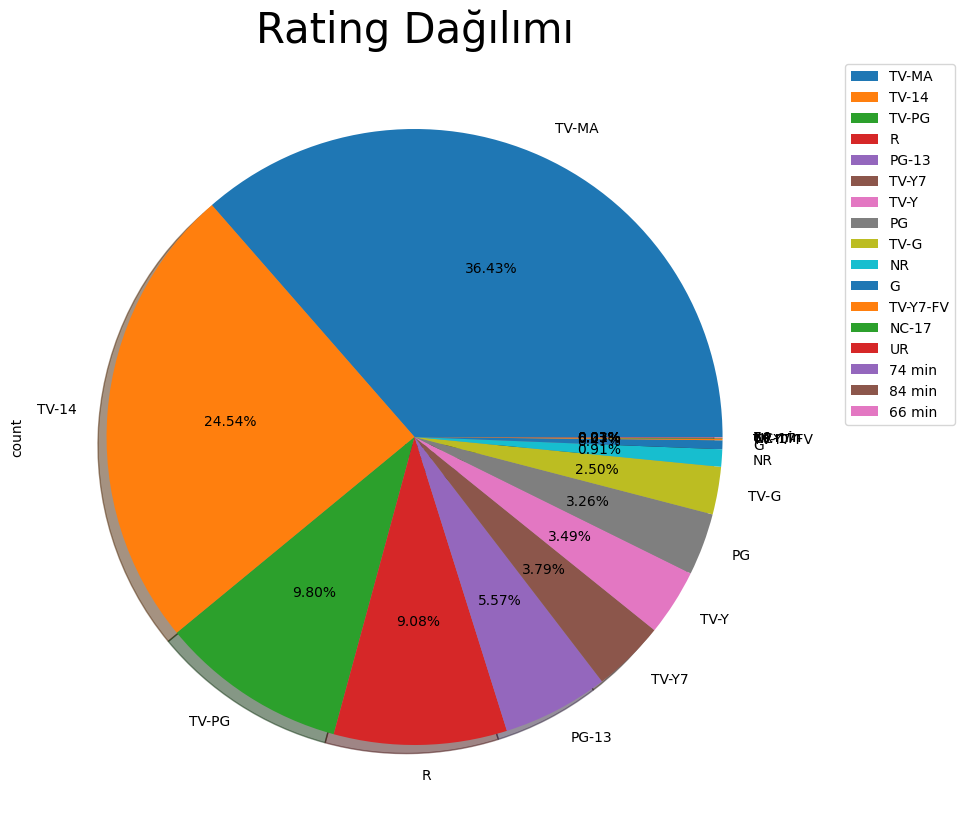

In [19]:
# Rating dağılımı (pie chart)
df["rating"].value_counts().plot.pie(autopct="%.2f%%", shadow=True, figsize=(10, 10))
plt.title("Rating Dağılımı", fontsize=30)
plt.legend(df["rating"].value_counts().index, loc="center left", bbox_to_anchor=(1.05, 0.75))
plt.show()

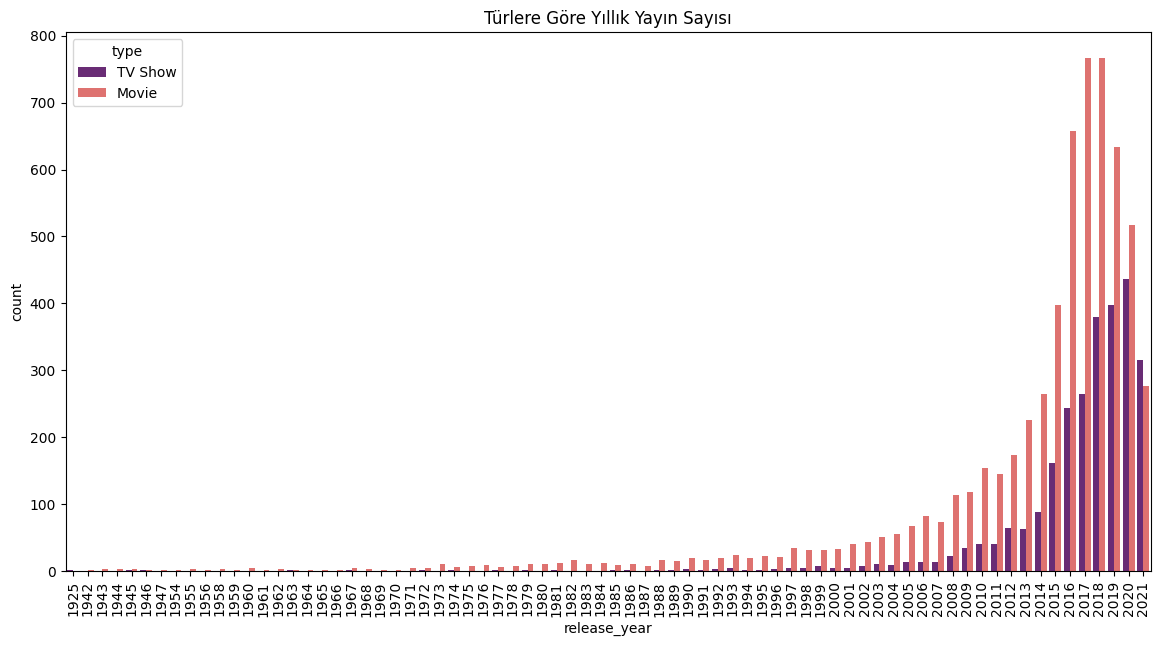

In [20]:
# Türlere göre yıllık yayın sayısı
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x="release_year", hue="type", palette="magma")
plt.xticks(rotation=90)
plt.title("Türlere Göre Yıllık Yayın Sayısı")
plt.show()

<ipython-input-21-efc4b79e2e91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="magma", hue=None, legend=False)


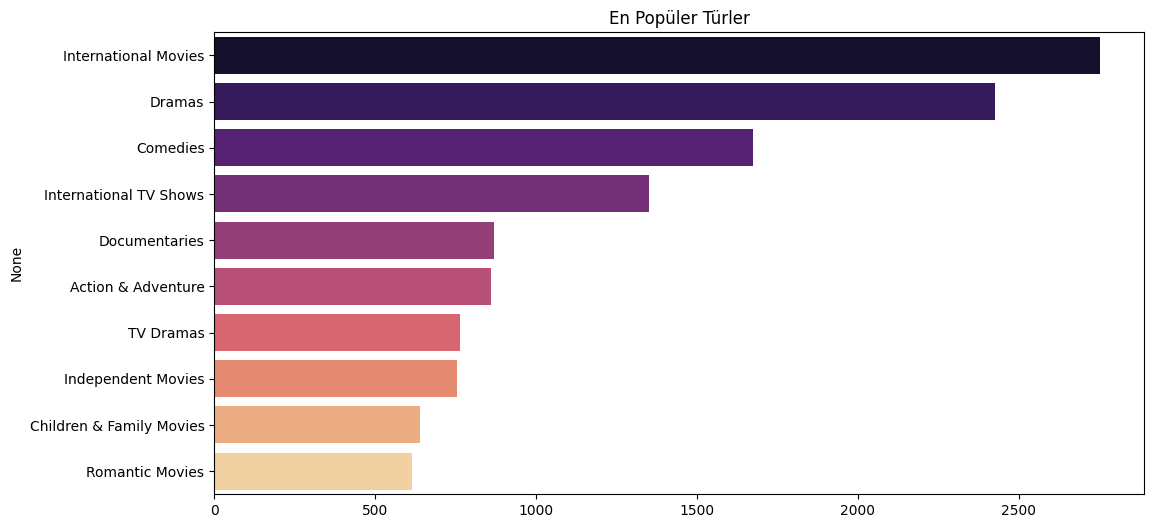

In [21]:
# En popüler türlerin analizi ve görselleştirilmesi
plt.figure(figsize=(12, 6))
top_genres = df["listed_in"].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette="magma", hue=None, legend=False)
plt.title("En Popüler Türler")
plt.show()